In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import dateutil
import matplotlib.pyplot as plt

In [152]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [3]:
tst_d = pd.read_csv('data/full-list-covid-19-tests-per-day.csv')
tst_t = pd.read_csv('data/full-list-total-tests-for-covid-19.csv')
deaths_w = pd.read_csv('data/total_deaths.csv')
cases_w = pd.read_csv('data/total_cases.csv')

In [4]:
with open('data/india/all_totals.json') as f:
    ind_tot = json.load(f)

In [5]:
with open('data/india/total_confirmed_cases.json') as f:
    ind_con = json.load(f)

In [6]:
active = pd.DataFrame(columns=['date', 'active_cases'])

for row in ind_con['rows']:
    if row['key'][1] == 'total_confirmed':
        temp = pd.DataFrame([[row['key'][0], row['value']]])
        temp.columns = ['date', 'active_cases']
        active = active.append(temp, ignore_index=True)

In [7]:
cured = pd.DataFrame(columns=['date', 'cured'])

for row in ind_tot['rows']:
    if row['key'][1] == 'cured':
        temp = pd.DataFrame([[row['key'][0], row['value']]])
        temp.columns = ['date', 'cured']
        cured = cured.append(temp, ignore_index=True)

In [8]:
death = pd.DataFrame(columns=['date', 'death'])

for row in ind_tot['rows']:
    if row['key'][1] == 'death':
        temp = pd.DataFrame([[row['key'][0], row['value']]])
        temp.columns = ['date', 'death']
        death = death.append(temp, ignore_index=True)

In [9]:
t = pd.merge(active, cured, on='date')
india_totals = pd.merge(t, death, on='date')

In [10]:
india_totals['date_read'] = india_totals['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))

In [11]:
india_totals['dup1'] = (~india_totals['date_read'].duplicated(keep='last')).astype(int)
india_totals['dup1'] = np.where(india_totals['date_read'].duplicated(keep='last'), 0, 1)
india_totals = india_totals[india_totals['dup1'] == 1]

In [12]:
india_totals.head()

,date,active_cases,cured,death,date_read,dup1
0,2020-01-30T13:33:00.00+05:30,1,0,0,"Jan 30, 2020",1
1,2020-02-02T10:39:00.00+05:30,2,0,0,"Feb 2, 2020",1
2,2020-02-03T12:13:00.00+05:30,3,0,0,"Feb 3, 2020",1
3,2020-03-02T14:28:00.00+05:30,5,0,0,"Mar 2, 2020",1
4,2020-03-03T19:36:00.00+05:30,6,0,0,"Mar 3, 2020",1


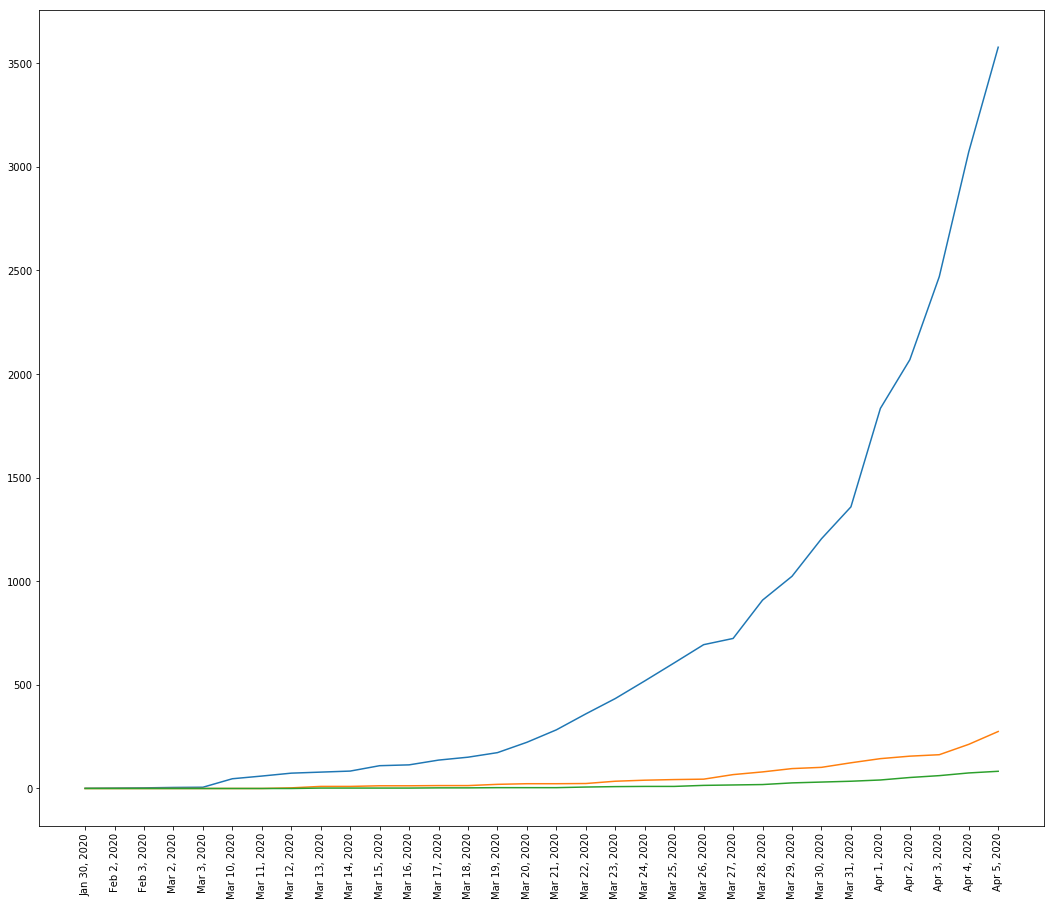

In [13]:
plt.plot(india_totals['date_read'], india_totals['active_cases'])
plt.plot(india_totals['date_read'], india_totals['cured'])
plt.plot(india_totals['date_read'], india_totals['death'])
plt.xticks(india_totals['date_read'], india_totals['date_read'], rotation='vertical')
plt.show()

In [14]:
tst_t = pd.read_csv('data/full-list-total-tests-for-covid-19.csv')

In [15]:
india_tests = tst_t[tst_t['Entity'].str.contains('India - samples')][['Date', 'Cumulative total tests']]

In [16]:
india_tests = india_tests.reset_index(drop=True)
india_tests.columns = ['date_read', 'total_tests']

In [17]:
india_test_totals = pd.merge(india_tests, india_totals, on='date_read')

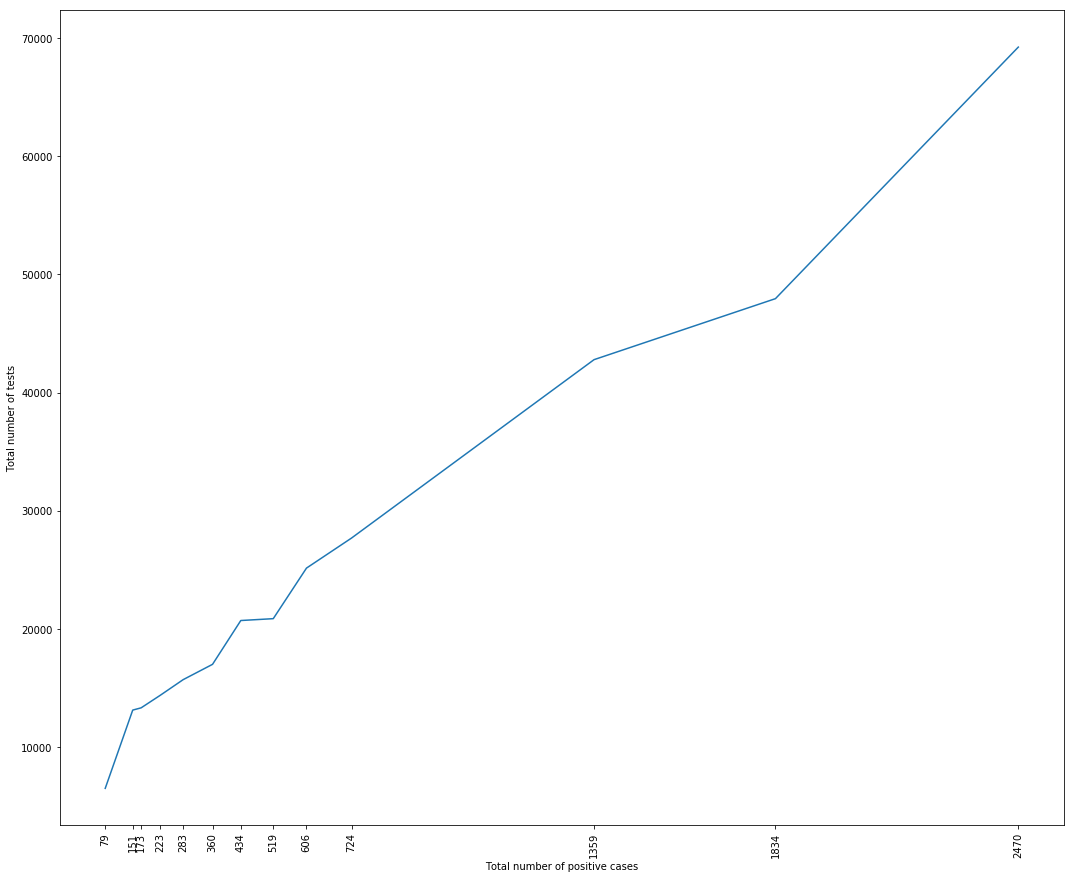

In [18]:
plt.plot(india_test_totals['active_cases'], india_test_totals['total_tests'])
plt.xticks(india_test_totals['active_cases'], india_test_totals['active_cases'], rotation='vertical')
plt.xlabel('Total number of positive cases')
plt.ylabel('Total number of tests')
plt.show()

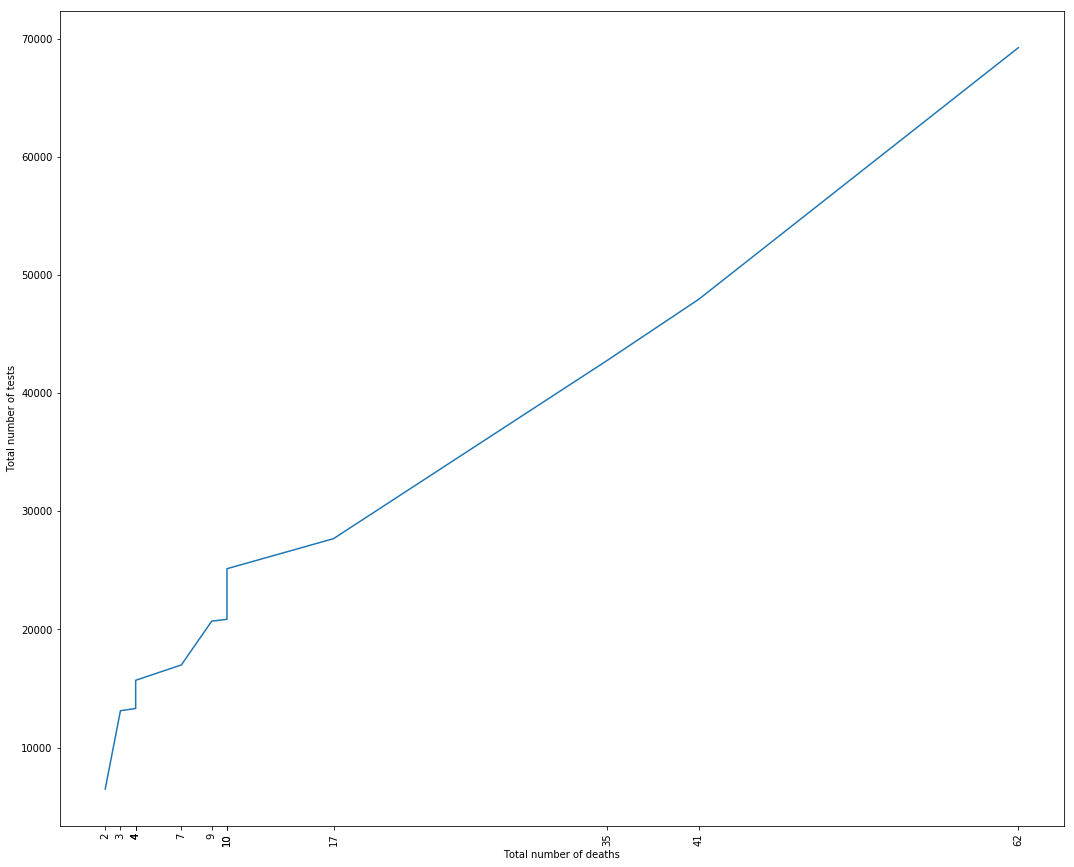

In [19]:
plt.plot(india_test_totals['death'], india_test_totals['total_tests'])
plt.xticks(india_test_totals['death'], india_test_totals['death'], rotation='vertical')
plt.xlabel('Total number of deaths')
plt.ylabel('Total number of tests')
plt.show()

In [20]:
def get_country_stats(c, query, cases_w, deaths_w, tst_t):
    cases = cases_w[['date', c]]
    deaths = deaths_w[['date', c]]
    tests = tst_t[tst_t['Entity'].str.contains(c + ' - ' + query)][['Date', 'Cumulative total tests']]
    
    tests['date_read'] = tests['Date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
    cases['date_read'] = cases['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
    deaths['date_read'] = deaths['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
    
    test_cases = pd.merge(tests, cases, on='date_read')
    test_deaths = pd.merge(tests, deaths, on='date_read')
    
    return test_cases, test_deaths

In [154]:
usa_test_cases, usa_test_deaths = get_country_stats('United States', 'inconsistent', cases_w, deaths_w, tst_t)
sk_test_cases, sk_test_deaths = get_country_stats('South Korea', 'cases', cases_w, deaths_w, tst_t)
india_test_cases, india_test_deaths = get_country_stats('India', 'people', cases_w, deaths_w, tst_t)
italy_test_cases, italy_test_deaths = get_country_stats('Italy', '', cases_w, deaths_w, tst_t)
pk_test_cases, pk_test_deaths = get_country_stats('Pakistan', '', cases_w, deaths_w, tst_t)

/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [147]:
sk_test_cases = sk_test_cases[:37]
sk_test_deaths = sk_test_deaths[:49]

In [148]:
usa_test_cases = usa_test_cases[:12]
usa_test_deaths = usa_test_deaths[:13]

In [149]:
italy_test_cases = italy_test_cases[:12]
italy_test_deaths = italy_test_deaths[:10]

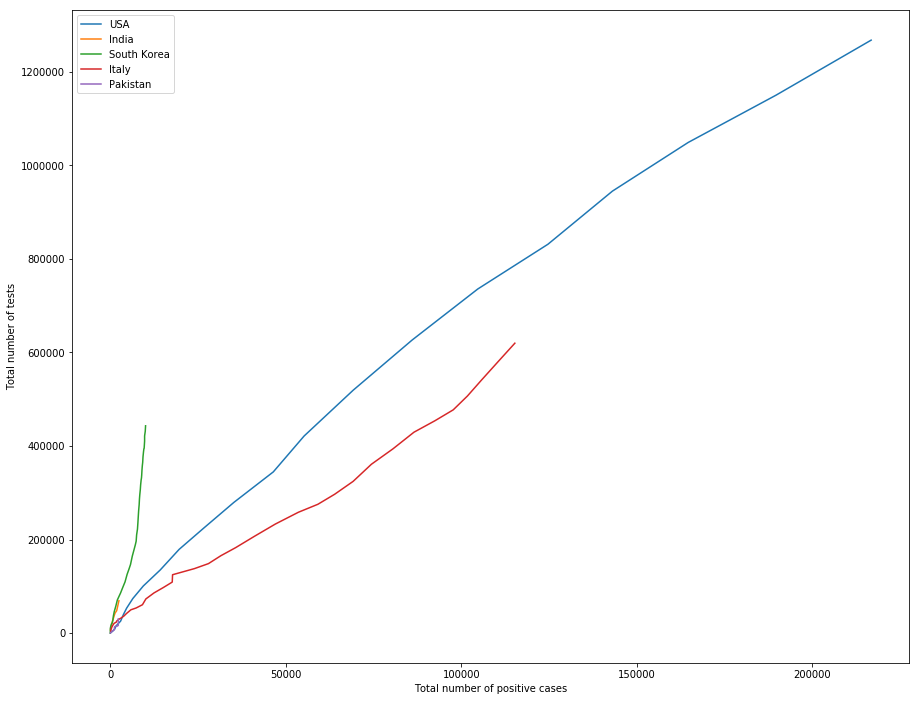

In [155]:
plt.plot(usa_test_cases['United States'], usa_test_cases['Cumulative total tests'], label='USA')
plt.plot(india_test_totals['active_cases'], india_test_totals['total_tests'], label='India')
plt.plot(sk_test_cases['South Korea'], sk_test_cases['Cumulative total tests'], label='South Korea')
plt.plot(italy_test_cases['Italy'], italy_test_cases['Cumulative total tests'], label='Italy')
plt.plot(pk_test_cases['Pakistan'], pk_test_cases['Cumulative total tests'], label='Pakistan')
plt.legend(loc="upper left")
# plt.xticks(usa_test_cases['United States'], usa_test_cases['United States'], rotation='vertical')
plt.xlabel('Total number of positive cases')
plt.ylabel('Total number of tests')
plt.show()

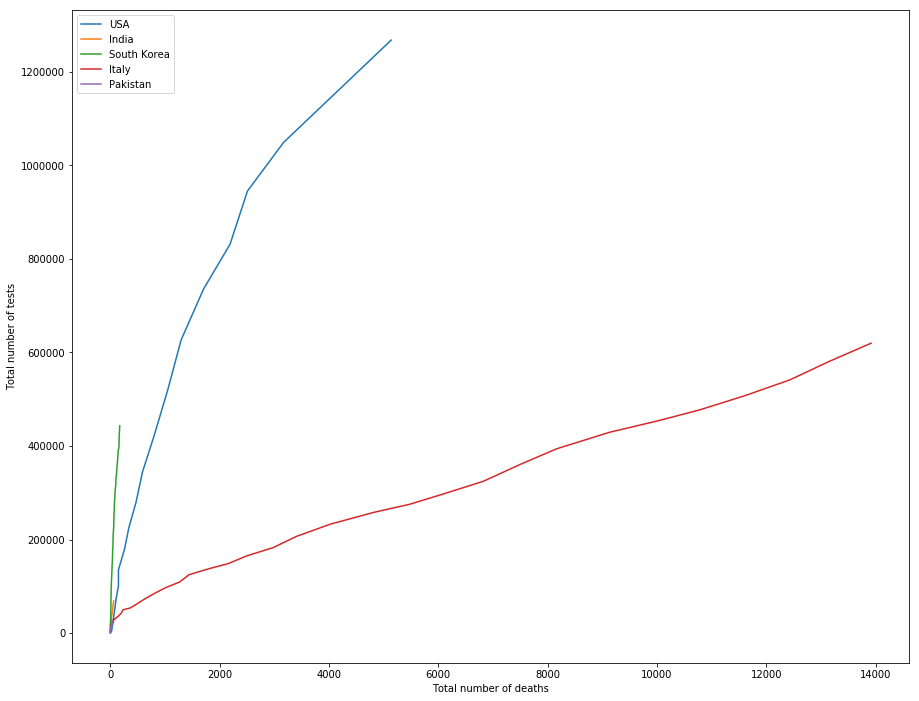

In [156]:
plt.plot(usa_test_deaths['United States'], usa_test_deaths['Cumulative total tests'], label='USA')
plt.plot(india_test_totals['death'], india_test_totals['total_tests'], label='India')
plt.plot(sk_test_deaths['South Korea'], sk_test_deaths['Cumulative total tests'], label='South Korea')
plt.plot(italy_test_deaths['Italy'], italy_test_deaths['Cumulative total tests'], label='Italy')
plt.plot(pk_test_deaths['Pakistan'], pk_test_deaths['Cumulative total tests'], label='Pakistan')
plt.legend(loc="upper left")
# plt.xticks(usa_test_cases['United States'], usa_test_cases['United States'], rotation='vertical')
plt.xlabel('Total number of deaths')
plt.ylabel('Total number of tests')
plt.show()